In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import svd

In [2]:
cancer_data = pd.read_csv('data.csv')

In [3]:
cancer_data.shape

(569, 33)

In [4]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#now we have to check which of this files contain null values

In [6]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#

cancer_data = cancer_data.drop(columns= ['Unnamed: 32'])
cancer_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [8]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#print the summary statistics

cancer_data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

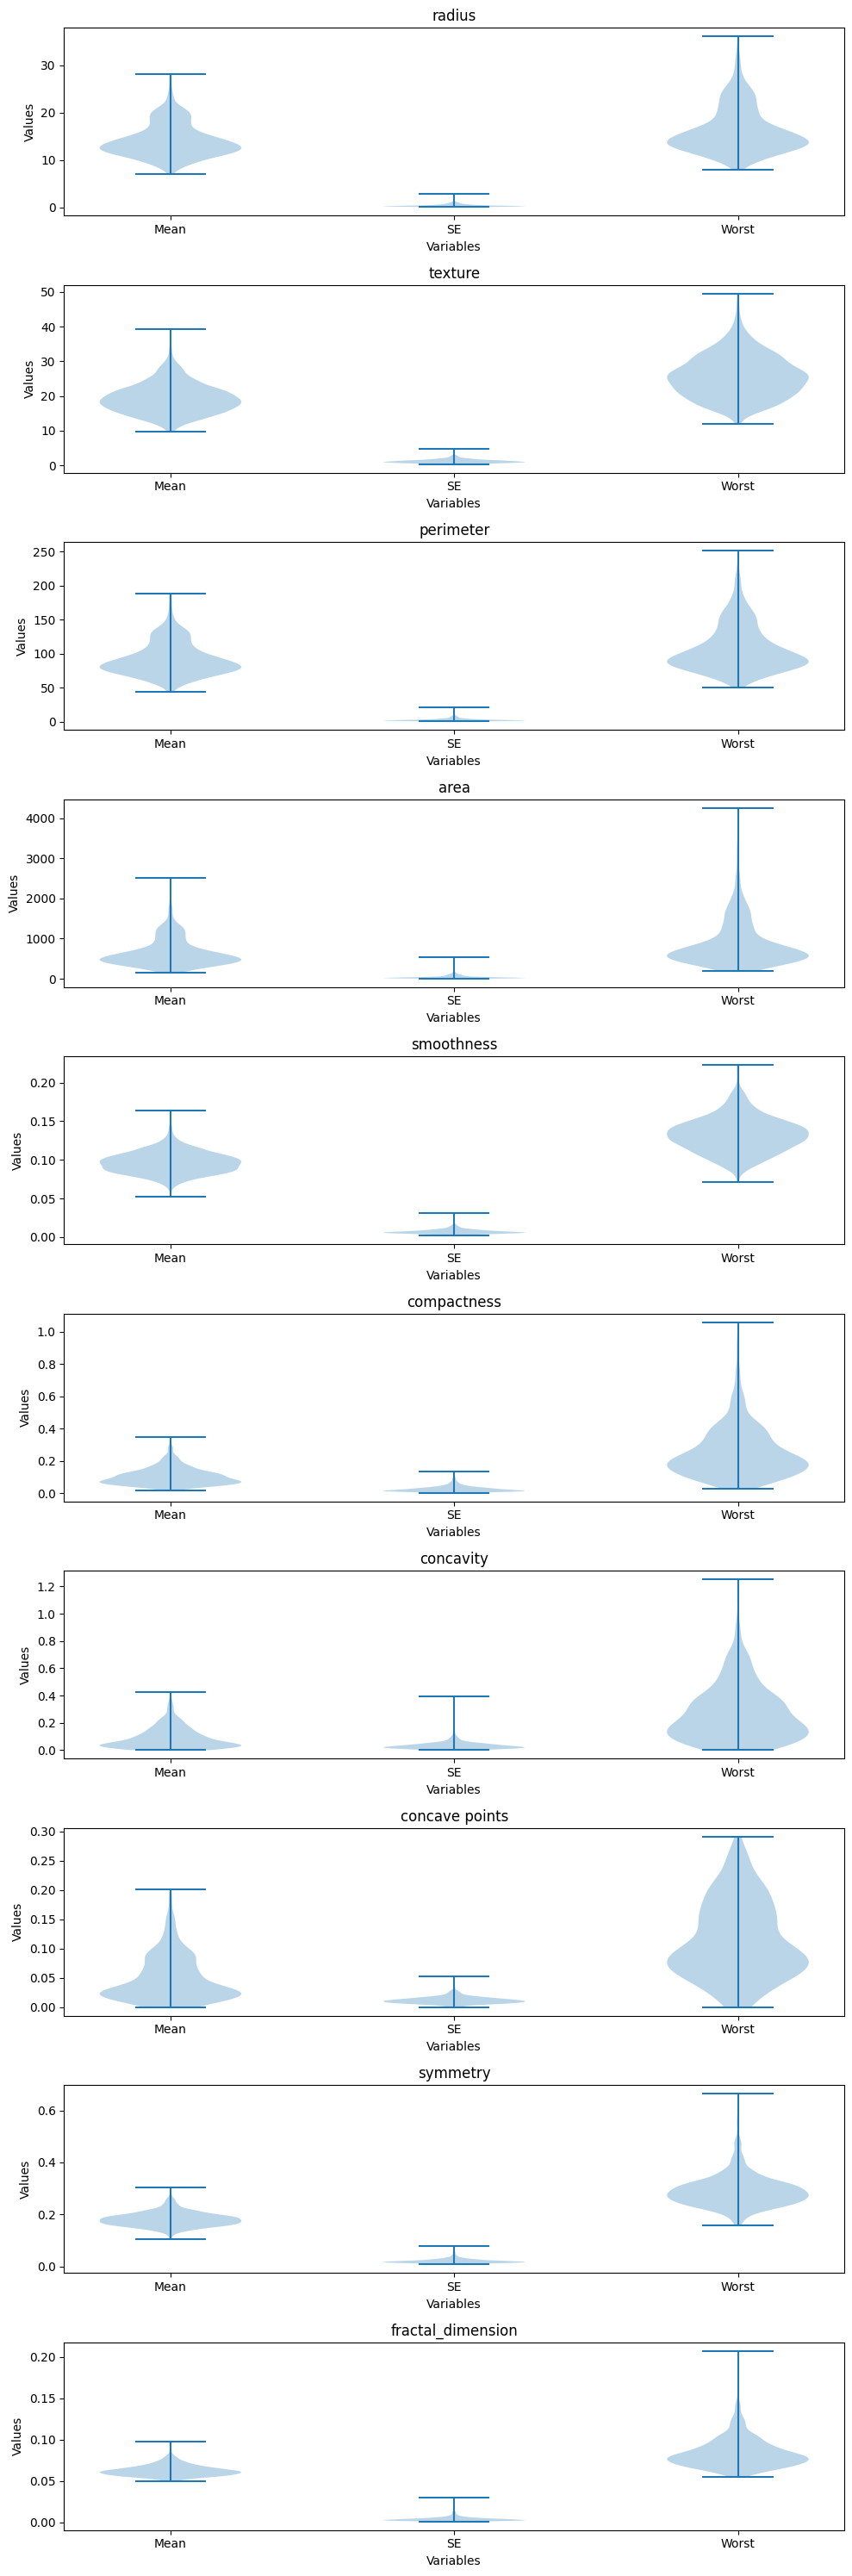

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming cancer_data is your DataFrame containing the relevant columns

columns_of_interest = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
                       'compactness', 'concavity', 'concave points', 'symmetry', 
                       'fractal_dimension']

# Create side-by-side violin plots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))

for i, column in enumerate(columns_of_interest):
    # Select columns for '_mean', '_se', and '_worst'
    columns_to_plot = [f"{column}_mean", f"{column}_se", f"{column}_worst"]
    
    # Extract data for each column to plot
    data = [cancer_data[col] for col in columns_to_plot]
    
    # Plot the violin plots
    axes[i].violinplot(data)
    
    # Set x-axis labels
    axes[i].set_xticks(np.arange(1, len(columns_to_plot) + 1))
    axes[i].set_xticklabels(['Mean', 'SE', 'Worst'])
    
    # Set plot title
    axes[i].set_title(column)
    
    # Set plot labels
    axes[i].set_xlabel('Variables')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


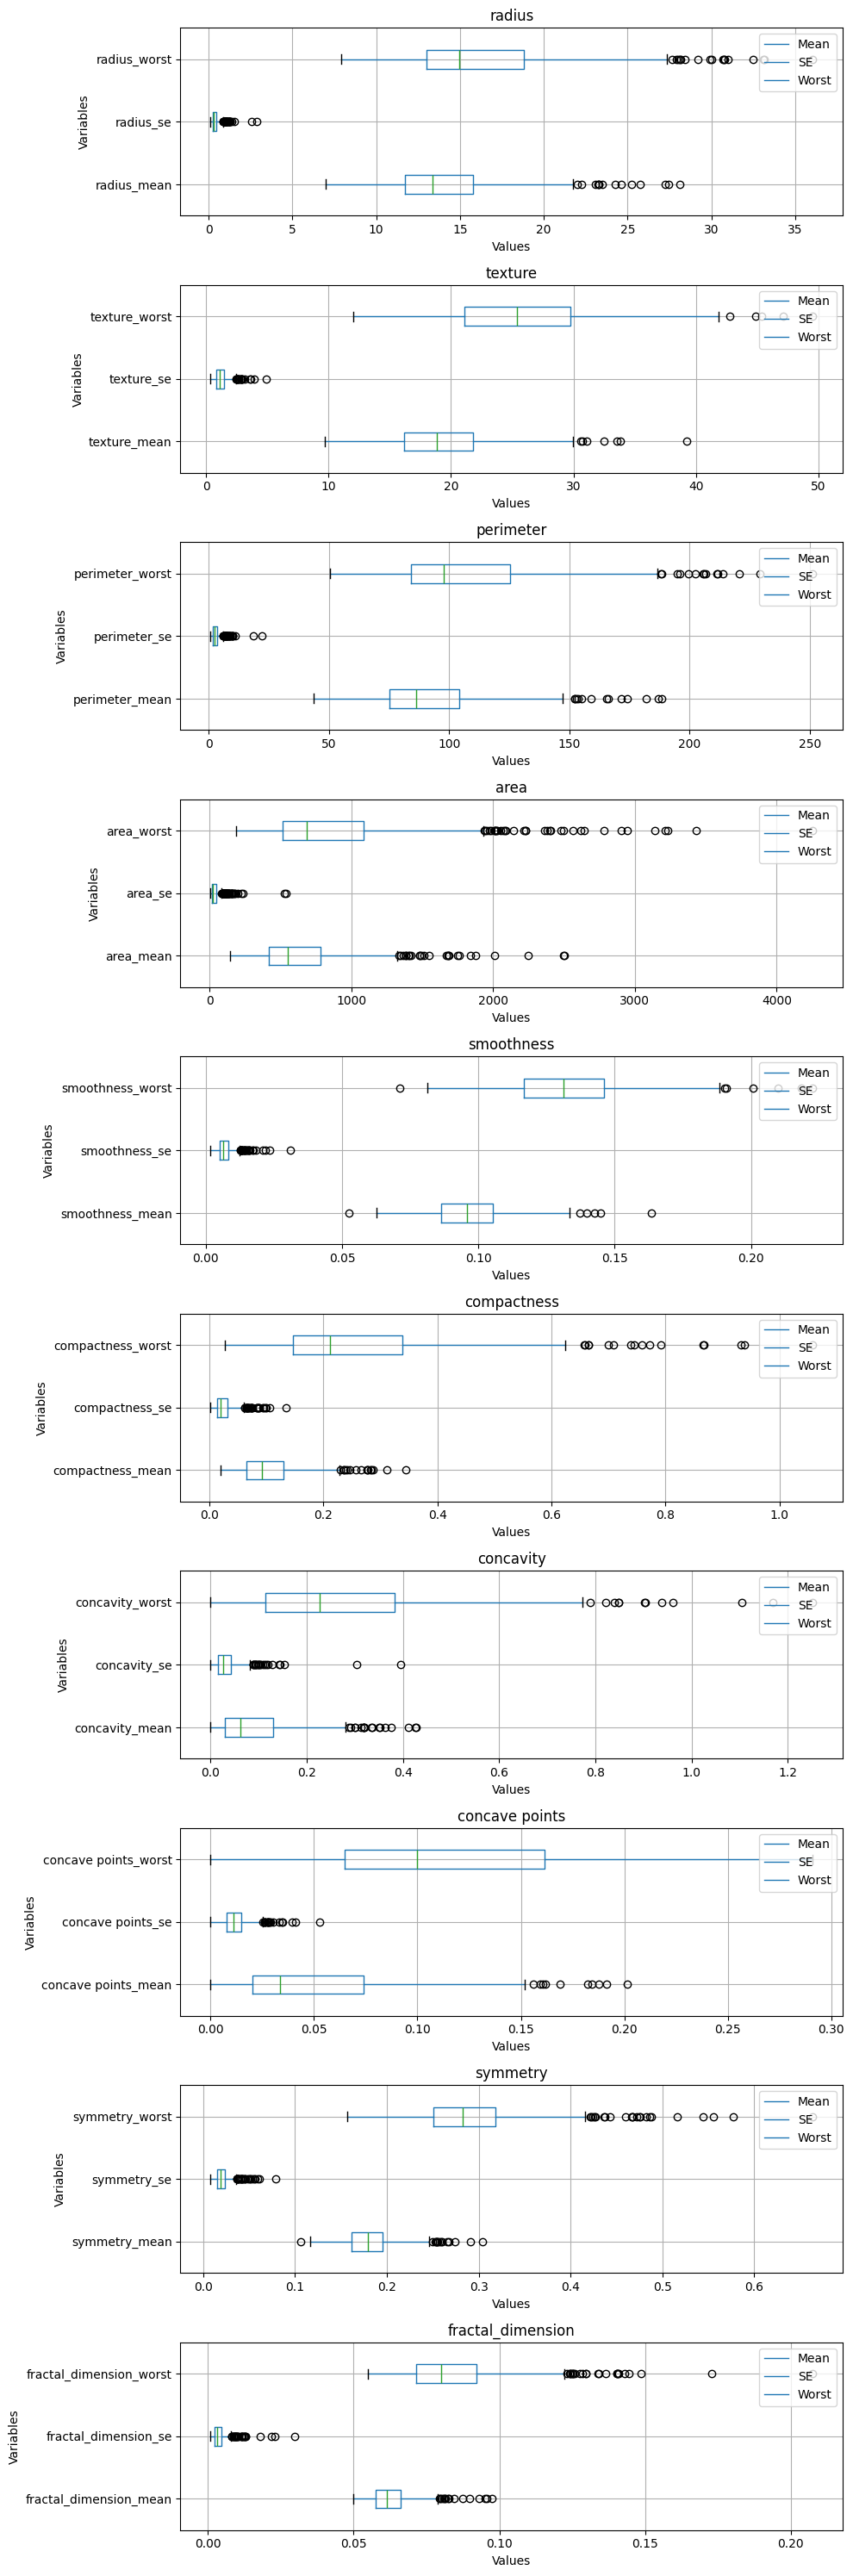

In [12]:
columns_of_interest = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
                       'compactness', 'concavity', 'concave points', 'symmetry', 
                       'fractal_dimension']

# Create side-by-side boxplots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))

for i, column in enumerate(columns_of_interest):
    # Select columns for '_mean', '_se', and '_worst'
    columns_to_plot = [f"{column}_mean", f"{column}_se", f"{column}_worst"]
    
    # Plot the boxplots
    cancer_data[columns_to_plot].boxplot(ax=axes[i], vert=False)
    
    # Set plot title
    axes[i].set_title(column)
    
    # Set plot labels
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Variables')
    
    # Add legend
    axes[i].legend(['Mean', 'SE', 'Worst'], loc='upper right')

plt.tight_layout()
plt.show()

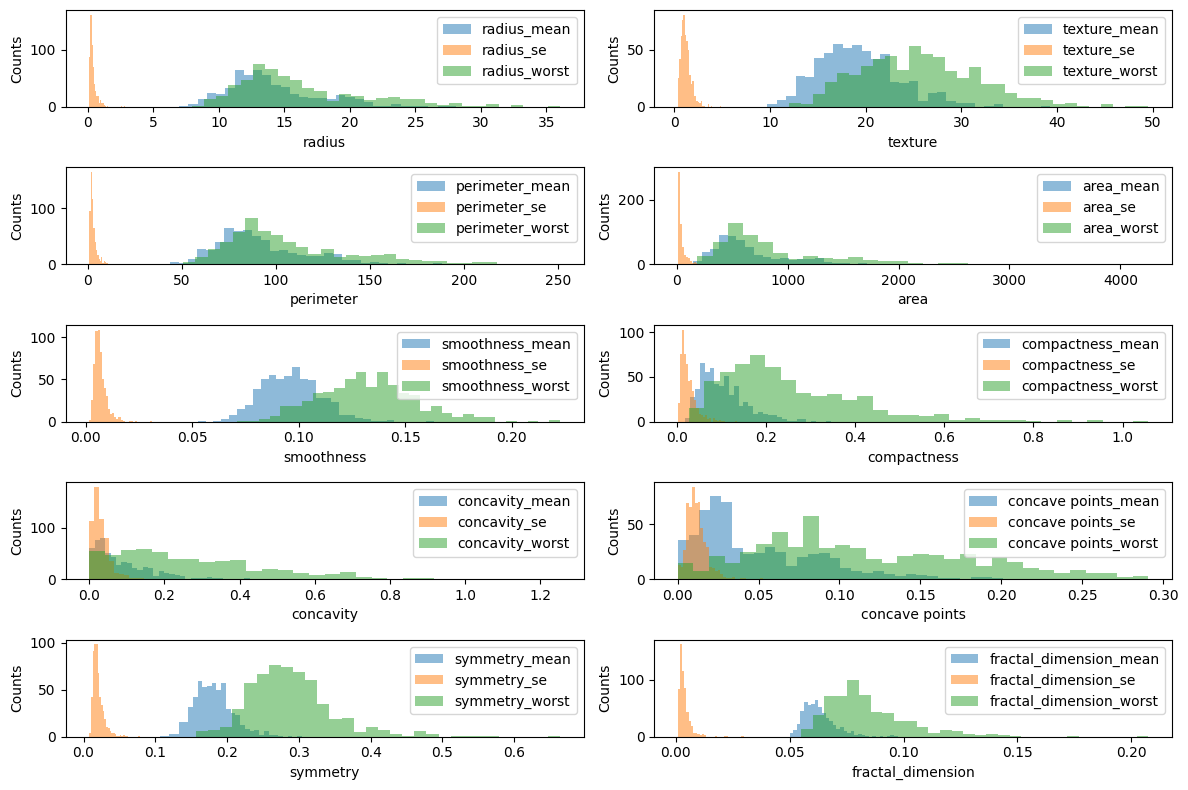

In [13]:
num_rows = len(columns_of_interest) // 2 + len(columns_of_interest) % 2

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))

for i, column in enumerate(columns_of_interest):
    # Calculate the row and column indices for the current subplot
    row_index = i // 2
    col_index = i % 2
    
    # Select columns for '_mean', '_se', and '_worst'
    columns_to_plot = [f"{column}_mean", f"{column}_se", f"{column}_worst"]
    
    # Plot histograms for each column in the current row
    for j, col in enumerate(columns_to_plot):
        axes[row_index, col_index].hist(cancer_data[col], bins=30, alpha=0.5, label=col)
       # axes[row_index, col_index].set_title(column)  # Set title for the subplot
        axes[row_index, col_index].set_xlabel(column)  # Set x-axis label as the column name
        axes[row_index, col_index].set_ylabel('Counts')  # Set y-axis label
        axes[row_index, col_index].legend()  # Show legend

plt.tight_layout()
plt.savefig('subplots_figure.png')
plt.show()

In [14]:
#we are going to proceed with these data from now on (the mean ones)
new_cancer_data = cancer_data.iloc[:, :12]# exclude the id column also
new_cancer_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 12 columns]

In [15]:
new_cancer_data = new_cancer_data.copy() # create a checkpoint

new_cancer_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 12 columns]

In [16]:
# first we are going to see how many are B and how many are M 
diagnosis_counts = new_cancer_data['diagnosis'].value_counts()


C:\Users\antot\AppData\Local\Temp\ipykernel_30340\1300513963.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=barplot_data, x='diagnosis', y='count', palette=colors)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

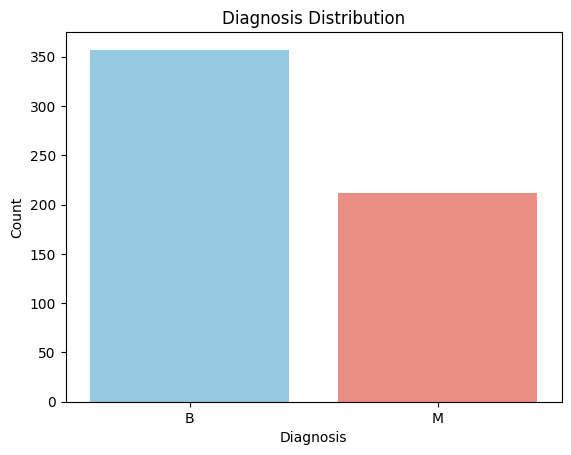

In [17]:
# Plot bar plot using seaborn
colors = {'B': 'skyblue', 'M': 'salmon'}


barplot_data = pd.DataFrame({'diagnosis': diagnosis_counts.index, 'count': diagnosis_counts.values})

# Plot bar plot using seaborn with different colors for each diagnosis
sns.barplot(data=barplot_data, x='diagnosis', y='count', palette=colors)
plt.title('Diagnosis Distribution')
plt.ylabel('Count')
plt.xlabel('Diagnosis')
plt.show()

In [19]:
# Iterate over column names
for col in new_cancer_data.columns:
    # Check if column name contains '_mean'
    if '_mean' in col:
        # Replace '_mean' with an empty string
        new_col_name = col.replace('_mean', '')
        # Rename the column
        new_cancer_data.rename(columns={col: new_col_name}, inplace=True)


c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

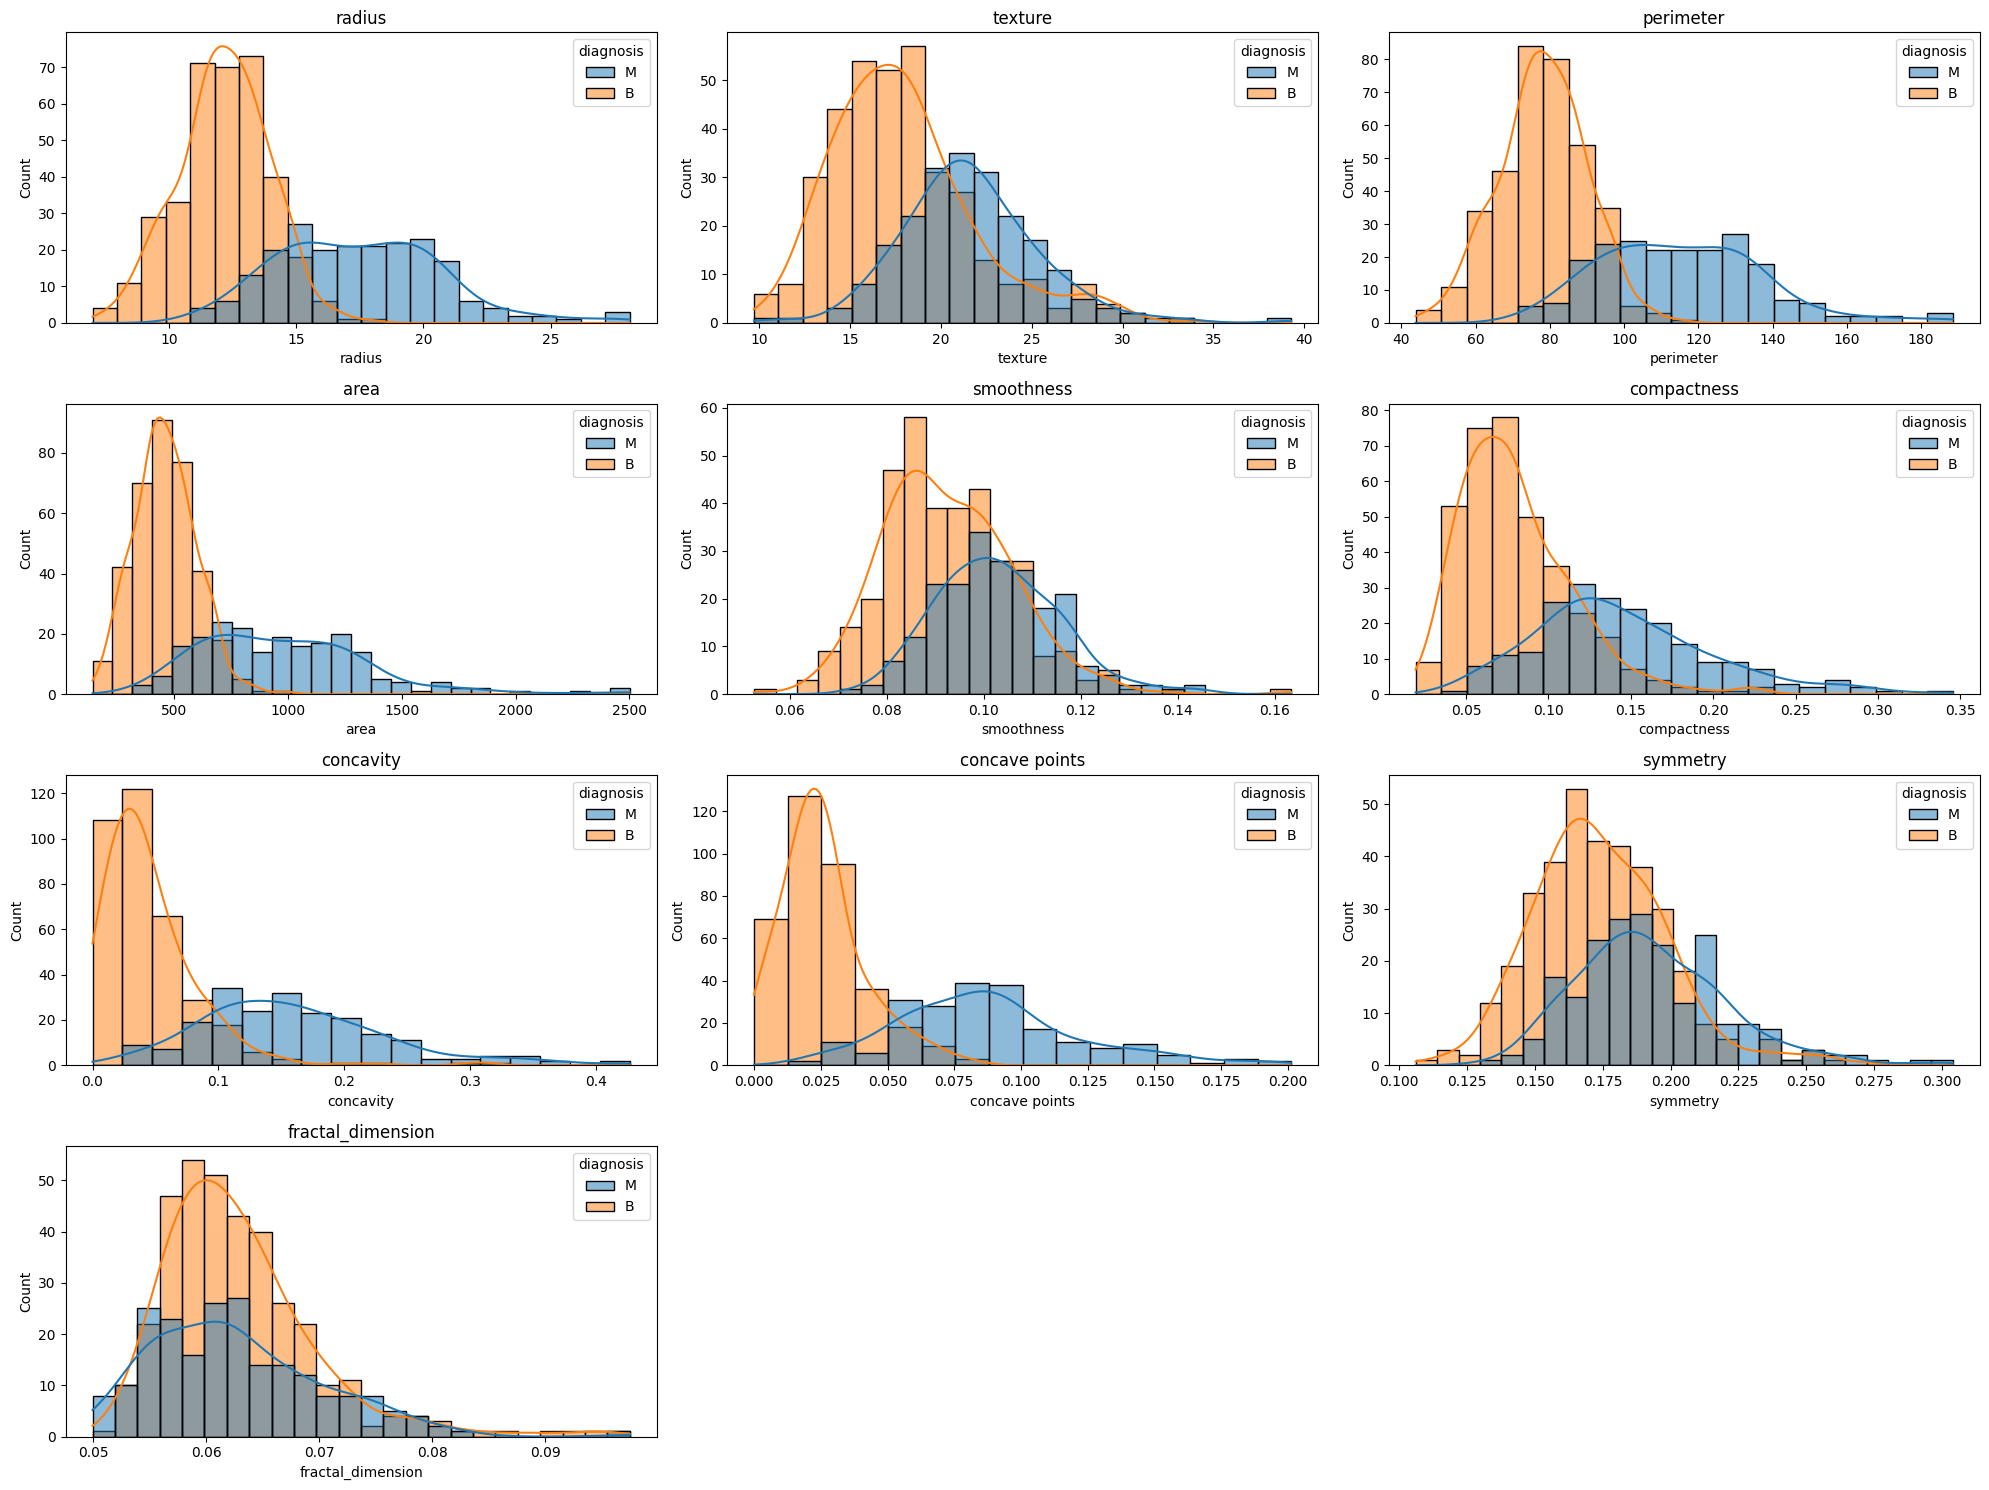

In [20]:
# The rest values that represent the metrics of the cells are continuous. As a result we are going to create a histogram for every variable to check the distribution
# We are going also to color the variables based on their dignosis to get a better intuition of the distribution

numerical_vars = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal_dimension']
n_vars = len(numerical_vars)



# Calculate the number of rows and columns based on the number of variables
num_rows = (n_vars - 1) // 3 + 1
num_cols = min(n_vars, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each variable
for i, var in enumerate(numerical_vars):
    sns.histplot(data=new_cancer_data, x=var, hue='diagnosis', kde=True, ax=axes[i])
    axes[i].set_title(var)  # Set title for each subplot

# Remove empty subplots
for j in range(n_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

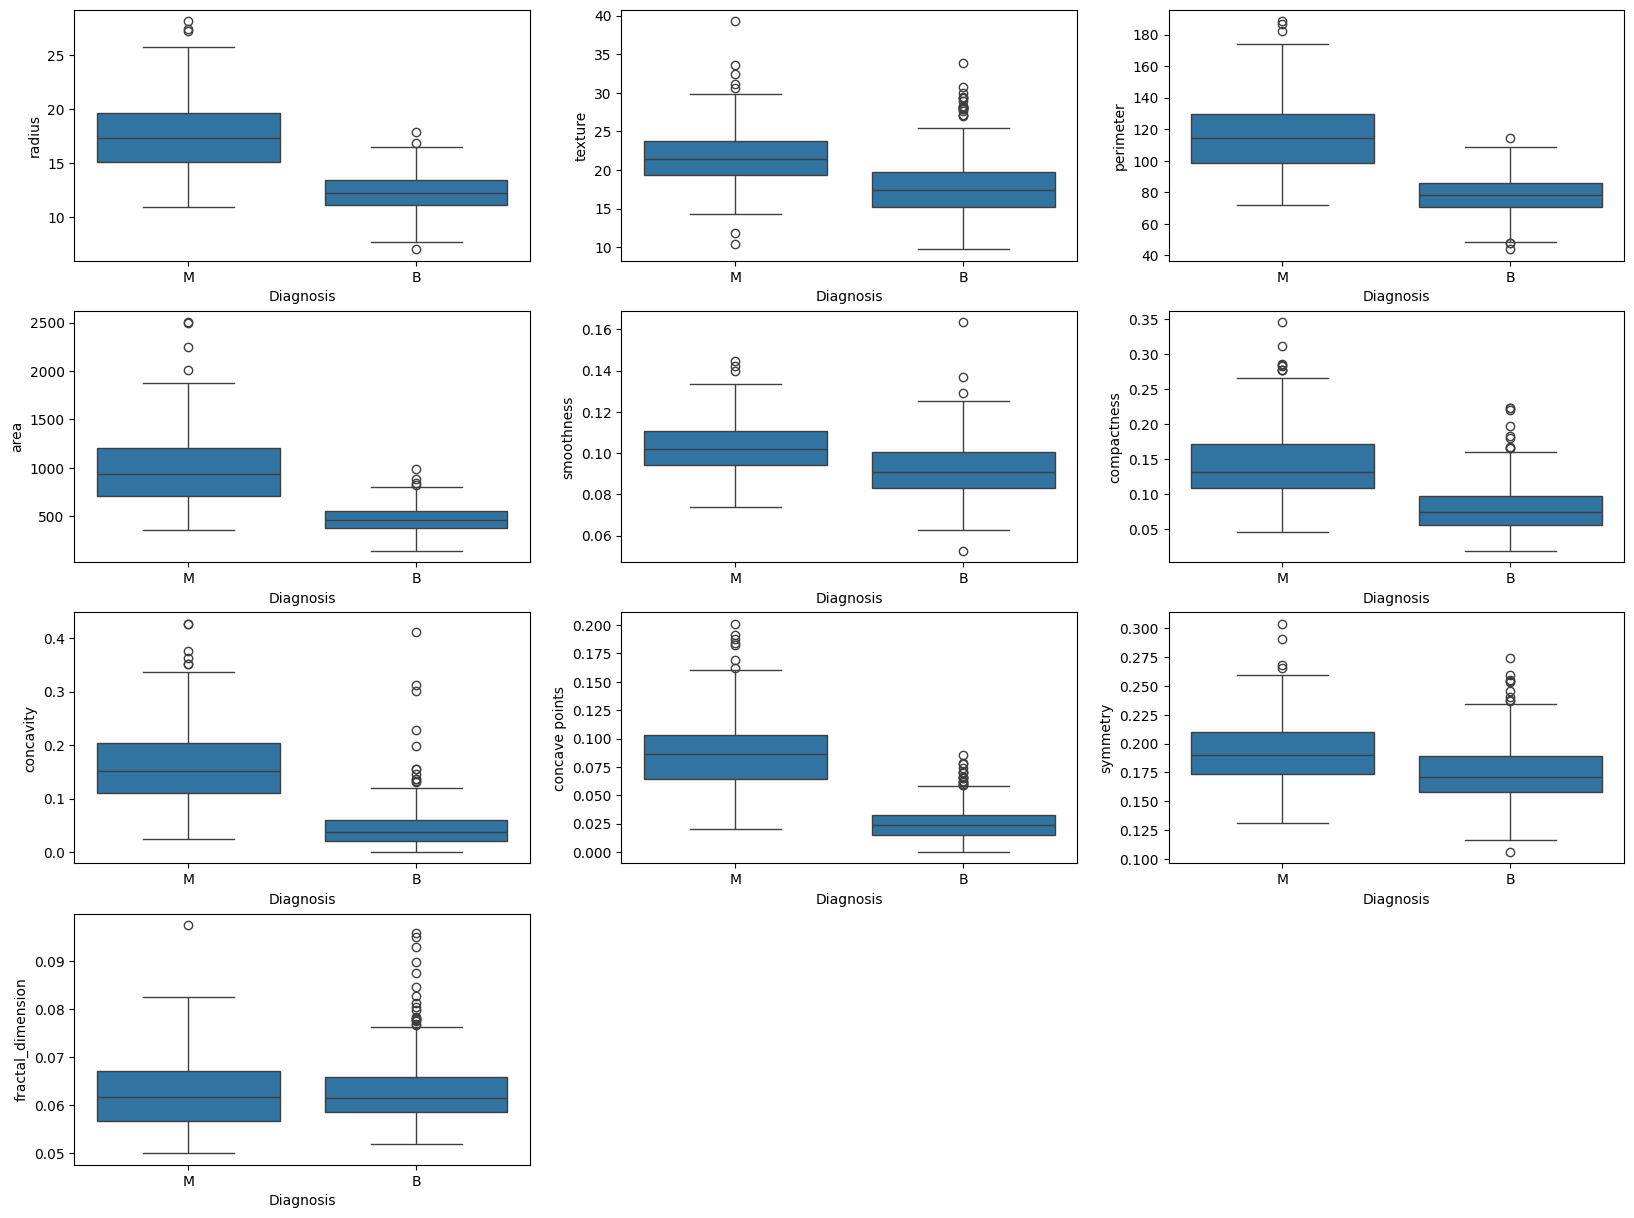

In [22]:

n_vars = len(numerical_vars)

# Calculate the number of rows and columns based on the number of variables
num_rows = (n_vars - 1) // 3 + 1
num_cols = min(n_vars, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar plots for each variable
for i, var in enumerate(numerical_vars):
    sns.boxplot(data=new_cancer_data, x='diagnosis', y=var, ax=axes[i])
    axes[i].set_xlabel('Diagnosis')  # Set x-axis label

for j in range(n_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

In [23]:

#Encode the 'B': 0, 'M': 1 so we can proceed further with our analysis
new_cancer_diagnosis = {'B': 0, 'M': 1}
new_cancer_data['diagnosis'] = new_cancer_data['diagnosis'].map(new_cancer_diagnosis)

new_cancer_data

id  diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302          1   17.99    10.38     122.80  1001.0     0.11840   
1      842517          1   20.57    17.77     132.90  1326.0     0.08474   
2    84300903          1   19.69    21.25     130.00  1203.0     0.10960   
3    84348301          1   11.42    20.38      77.58   386.1     0.14250   
4    84358402          1   20.29    14.34     135.10  1297.0     0.10030   
..        ...        ...     ...      ...        ...     ...         ...   
564    926424          1   21.56    22.39     142.00  1479.0     0.11100   
565    926682          1   20.13    28.25     131.20  1261.0     0.09780   
566    926954          1   16.60    28.08     108.30   858.1     0.08455   
567    927241          1   20.60    29.33     140.10  1265.0     0.11780   
568     92751          0    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave points  symmetry  fractal_dimension  
0        0.27760    0.30010         0.14710    0.2419            0.07871  
1        0.07864    0.08690         0.07017    0.1812            0.05667  
2        0.15990    0.19740         0.12790    0.2069            0.05999  
3        0.28390    0.24140         0.10520    0.2597            0.09744  
4        0.13280    0.19800         0.10430    0.1809            0.05883  
..           ...        ...             ...       ...                ...  
564      0.11590    0.24390         0.13890    0.1726            0.05623  
565      0.10340    0.14400         0.09791    0.1752            0.05533  
566      0.10230    0.09251         0.05302    0.1590            0.05648  
567      0.27700    0.35140         0.15200    0.2397            0.07016  
568      0.04362    0.00000         0.00000    0.1587            0.05884  

[569 rows x 12 columns]

c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\antot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

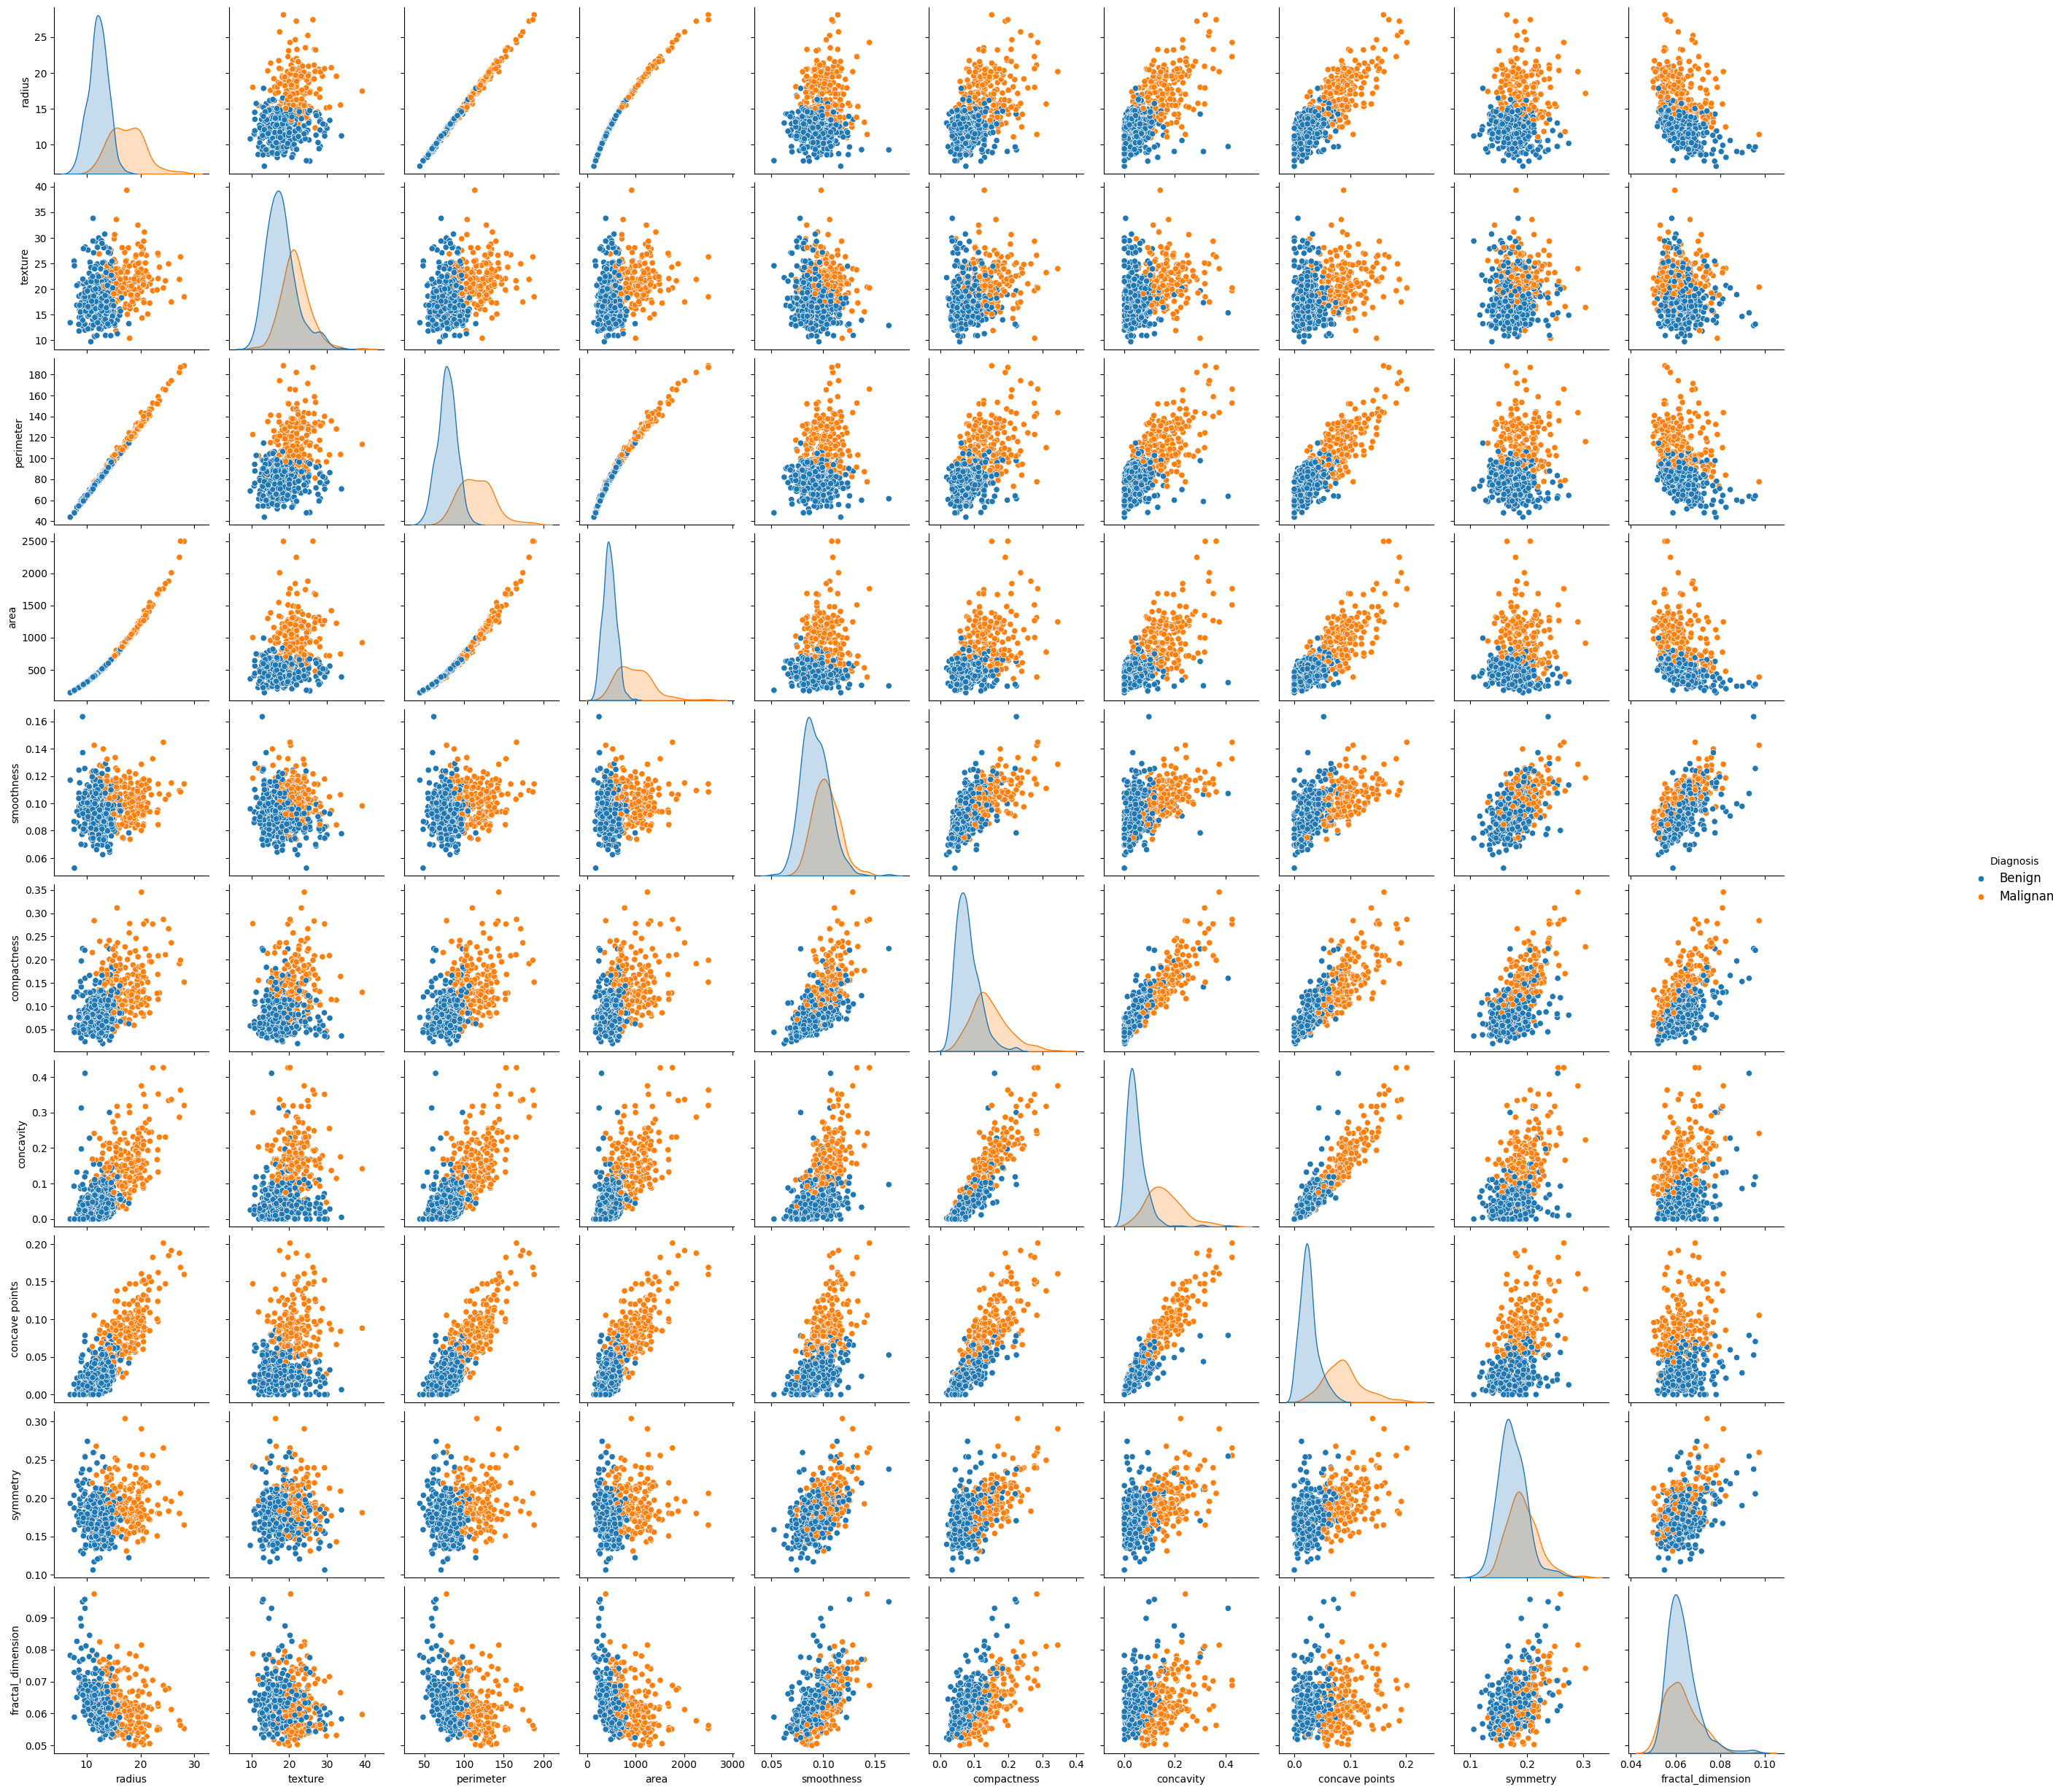

In [24]:

#create a matrix plot to view the first association of the data with eacvh other based on the diganosis feature
#we dont care abput the id
cancer_pairplot = sns.pairplot(new_cancer_data.iloc[:, 1:], hue='diagnosis')
cancer_pairplot._legend.set_title('Diagnosis')
cancer_pairplot._legend.set_bbox_to_anchor((1.1, 0.5))  # Adjust the position of the legend
#cancer_pairplot._legend.set_loc('center')

# Rename the labels
new_labels = {'0': 'Benign', '1': 'Malignant'}
for t, l in zip(cancer_pairplot._legend.texts, new_labels.values()):
    t.set_text(l)
    t.set_fontsize(12)

plt.show()


In [ ]:
#create a correlation matrix
correlation_matrix = new_cancer_data.iloc[:,2:].corr()
correlation_matrix

radius   texture  perimeter      area  smoothness  \
radius             1.000000  0.323782   0.997855  0.987357    0.170581   
texture            0.323782  1.000000   0.329533  0.321086   -0.023389   
perimeter          0.997855  0.329533   1.000000  0.986507    0.207278   
area               0.987357  0.321086   0.986507  1.000000    0.177028   
smoothness         0.170581 -0.023389   0.207278  0.177028    1.000000   
compactness        0.506124  0.236702   0.556936  0.498502    0.659123   
concavity          0.676764  0.302418   0.716136  0.685983    0.521984   
concave points     0.822529  0.293464   0.850977  0.823269    0.553695   
symmetry           0.147741  0.071401   0.183027  0.151293    0.557775   
fractal_dimension -0.311631 -0.076437  -0.261477 -0.283110    0.584792   

                   compactness  concavity  concave points  symmetry  \
radius                0.506124   0.676764        0.822529  0.147741   
texture               0.236702   0.302418        0.293464  0.071401   
perimeter             0.556936   0.716136        0.850977  0.183027   
area                  0.498502   0.685983        0.823269  0.151293   
smoothness            0.659123   0.521984        0.553695  0.557775   
compactness           1.000000   0.883121        0.831135  0.602641   
concavity             0.883121   1.000000        0.921391  0.500667   
concave points        0.831135   0.921391        1.000000  0.462497   
symmetry              0.602641   0.500667        0.462497  1.000000   
fractal_dimension     0.565369   0.336783        0.166917  0.479921   

                   fractal_dimension  
radius                     -0.311631  
texture                    -0.076437  
perimeter                  -0.261477  
area                       -0.283110  
smoothness                  0.584792  
compactness                 0.565369  
concavity                   0.336783  
concave points              0.166917  
symmetry                    0.479921  
fractal_dimension           1.000000

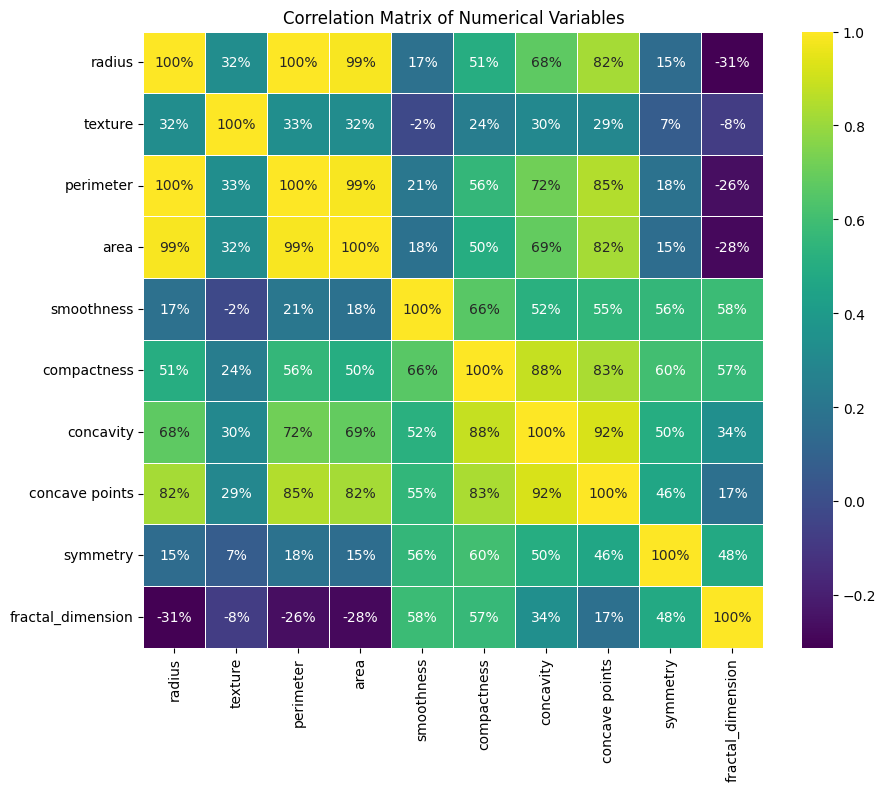

In [ ]:
plt.figure(figsize=(10, 8))

# Generate a heatmap with a color map of your choice
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".0%", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Numerical Variables')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [ ]:
#Perform the pca
#first we need to standardize our data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#First we need to exclude the non numeric data from our data set and the column that we are going to use for our predictions

X = new_cancer_data.iloc[:,2:] #separated the numerical data from the categorical
y = new_cancer_data['diagnosis'] # this is the column that we are going to predict

#Standardize the data
scaler = StandardScaler()# subtract the mean and divide with the standard deviation
scaled_data = scaler.fit_transform(X) #transform the data for the PCA


#Perform the PCA

pca = PCA() # The PCA function performs Singular Value Decomposition (SVD) internally to perform the dimensionality reduction.
pca_data = pca.fit_transform(scaled_data)



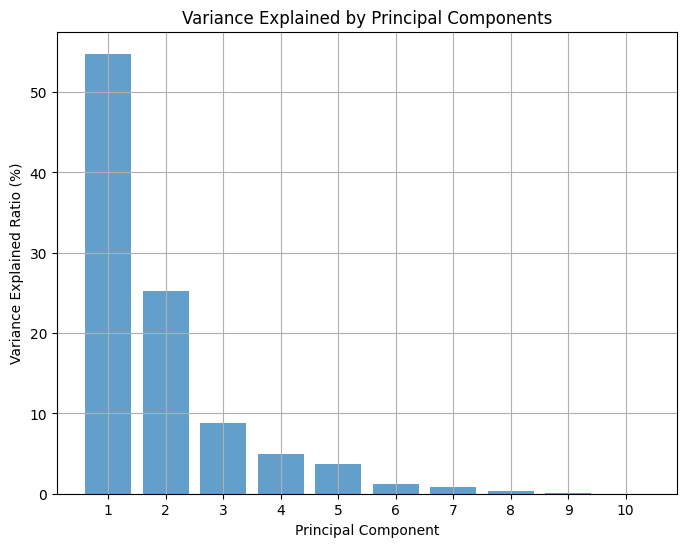

In [ ]:
#Variance explained plot

plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_ * 100, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio (%)')
plt.title('Variance Explained by Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

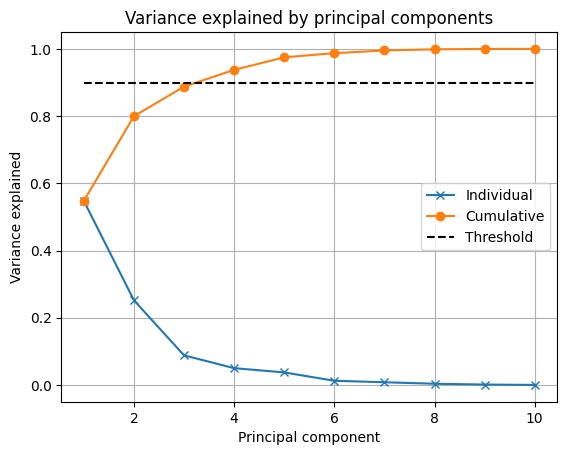

In [ ]:
threshold = 0.9
plt.figure()
######pca.explained_variance_ratio_ = is equivalent as the rho calculation in the exercises but it used more often as a method
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, "x-")
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), "o-")
plt.plot([1, len(pca.explained_variance_ratio_)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


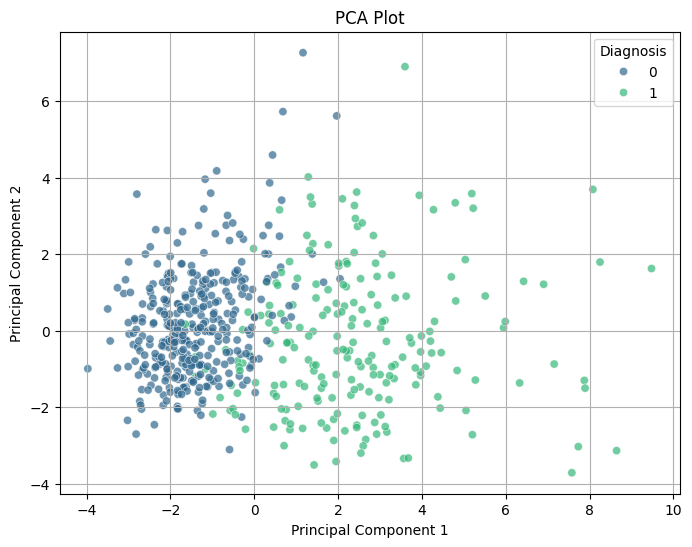

In [ ]:
#plot the PCA plot with the PC1 and PC2 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()

In [ ]:
#Get information about the principal coefficients

pc_df = pd.DataFrame(data=pca_data)

# Add the diagnosis column to the DataFrame
#pc_df['diagnosis'] = y

# Display the first few rows of the DataFrame
print(pc_df.head())

          0         1         2         3         4         5         6  \
0  5.224155  3.204428 -2.171340 -0.169276  1.514252  0.113123 -0.344684   
1  1.728094 -2.540839 -1.019679  0.547539  0.312330 -0.935634  0.420922   
2  3.969757 -0.550075 -0.323569  0.397964 -0.322877  0.271493  0.076506   
3  3.596713  6.905070  0.792832 -0.604828  0.243176 -0.616970 -0.068051   
4  3.151092 -1.358072 -1.862234 -0.185251  0.311342  0.090778  0.308087   

          7         8         9  
0 -0.231932 -0.021982 -0.011258  
1 -0.008343 -0.056171 -0.022992  
2 -0.355050  0.020116 -0.022675  
3 -0.100163 -0.043481 -0.053456  
4  0.099057 -0.026574  0.034113  


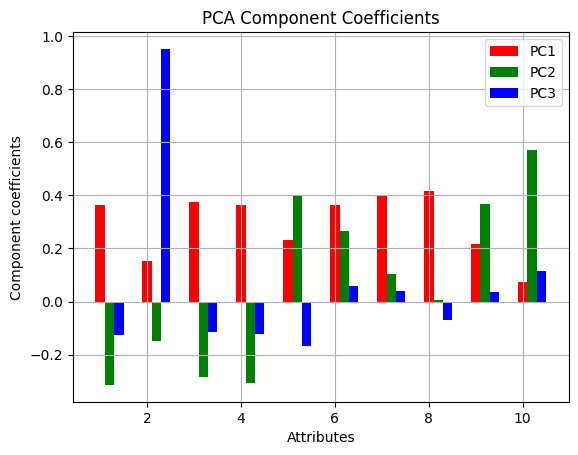

In [ ]:
# Check the variance explained by the first three principal components
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2

# Determine the number of attributes (features) directly from the shape of the principal components
num_attributes = pca.components_.shape[1]
r = np.arange(1, num_attributes + 1)

# Plot the coefficients of the first three principal components
for i, pc_index in enumerate(pcs):
    plt.bar(r + i * bw, pca.components_[pc_index], width=bw, color=c[i], label=legendStrs[i])

plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.title("PCA Component Coefficients")
plt.show()

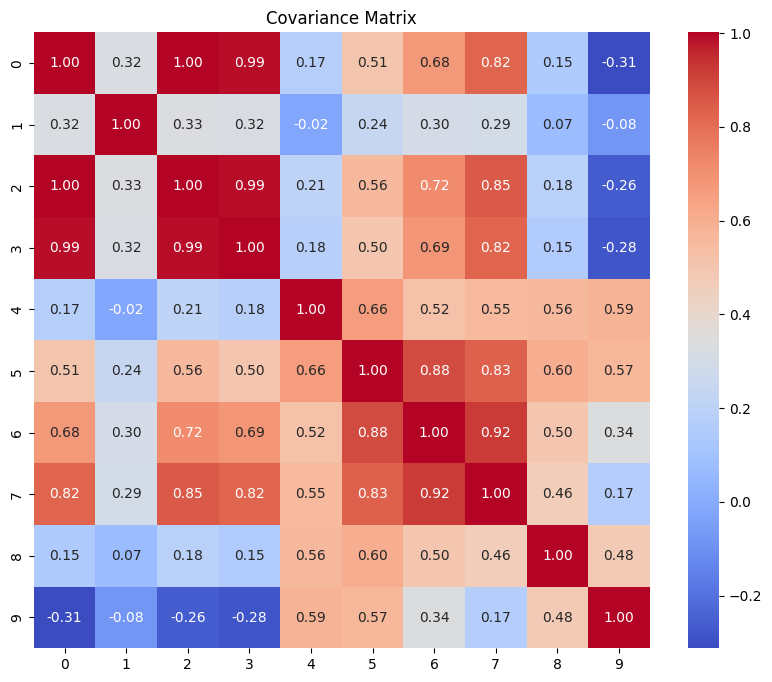

In [ ]:
#plot the covariance matrix (Σ)
cov_matrix = np.cov(scaled_data, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Covariance Matrix")
plt.show()
